Choose way to find  Polynomial:
1 - Lagrange
2 - Newton Forward
3 - Newton Backward
4 - Newton Divided Difference (NDD)
5 - Taylor Polynomial (around x0)
6 - Neville’s Method


Your choice:  1
How many points?  4
Enter x values separated by commas:  0,1,2,3
Enter f(x) values separated by commas:  1,5,12,7



✅ Polynomial:
P(x) = -2.5*x**3 + 9.0*x**2 - 2.5*x + 1.0

----------------------------------
Choose an option:
1 - Evaluate P(x) at a given x
2 - Find roots of the equation
3 - Compute approximation error
4 - Perform Curve Fitting and Plot (multiple degrees + quadrant control)
0 - Exit
----------------------------------


Your choice:  4
Enter degrees separated by commas:  4



Select which part to draw:
1 - Quadrant I (+x, +y)
2 - Quadrant II (-x, +y)
3 - Quadrant III (-x, -y)
4 - Quadrant IV (+x, -y)
5 - All


Your choice:  5


C:\Users\Compu\AppData\Local\Temp\ipykernel_1804\2267570845.py:232: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(points, pf, deg)


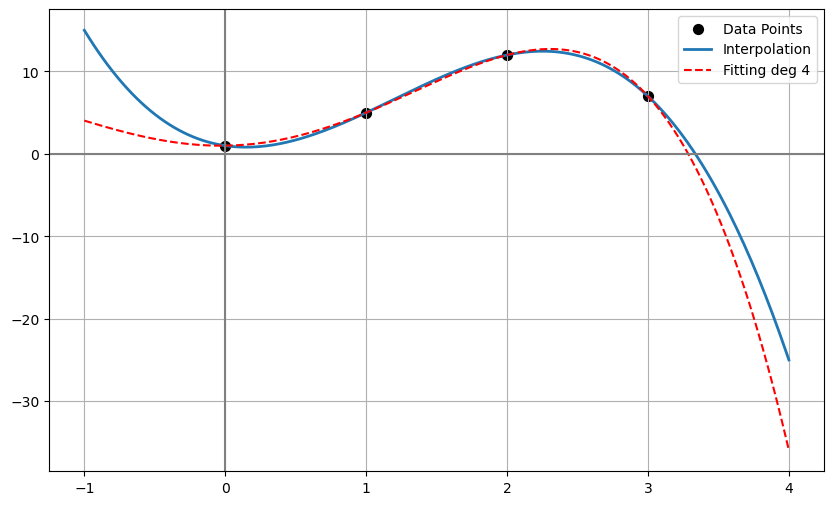


----------------------------------
Choose an option:
1 - Evaluate P(x) at a given x
2 - Find roots of the equation
3 - Compute approximation error
4 - Perform Curve Fitting and Plot (multiple degrees + quadrant control)
0 - Exit
----------------------------------


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.Symbol('x')

# ============================================================
# 1️⃣ اختيار طريقة الحساب
# ============================================================
print("Choose way to find  Polynomial:")
print("1 - Lagrange")
print("2 - Newton Forward")
print("3 - Newton Backward")
print("4 - Newton Divided Difference (NDD)")
print("5 - Taylor Polynomial (around x0)")
print("6 - Neville’s Method")
method = input("Your choice: ")

# ============================================================
# 2️⃣ إدخال البيانات
# ============================================================
n = int(input("How many points? "))
points = list(map(float, input("Enter x values separated by commas: ").split(',')))
pf = list(map(float, input("Enter f(x) values separated by commas: ").split(',')))

if len(points) != len(pf):
    print("❌ Number of x must equal number of f(x)!")
    exit()

# ============================================================
# 3️⃣ دوال كل طريقة
# ============================================================

# ------------------------ Lagrange ---------------------------
def lagrange_poly(points, pf):
    P = 0
    for j in range(n):
        Lj = 1
        for m in range(n):
            if m != j:
                Lj *= (x - points[m]) / (points[j] - points[m])
        P += pf[j] * Lj
    return sp.expand(P)

# -------------------- Newton Forward -------------------------
def newton_forward(points, pf):
    h = points[1] - points[0]
    diff = [pf.copy()]
    
    for i in range(1, n):
        col = []
        for j in range(n - i):
            col.append(diff[i - 1][j + 1] - diff[i - 1][j])
        diff.append(col)

    P = sp.sympify(diff[0][0])
    term = 1
    s = (x - points[0]) / h
    
    for i in range(1, n):
        term *= (s - (i - 1))
        P += term * sp.Rational(1,1) * sp.sympify(diff[i][0]) / sp.factorial(i)

    return sp.expand(P)

# -------------------- Newton Backward ------------------------
def newton_backward(points, pf):
    h = points[1] - points[0]
    diff = [pf.copy()]
    
    for i in range(1, n):
        col = []
        for j in range(n - i):
            col.append(diff[i - 1][j + 1] - diff[i - 1][j])
        diff.append(col)

    P = sp.sympify(diff[-1][-1])
    term = 1
    s = (x - points[-1]) / h
    
    for i in range(1, n):
        term *= (s + (i - 1))
        P += term * sp.sympify(diff[i][-1]) / sp.factorial(i)

    return sp.expand(P)

# ---------------- Newton Divided Difference ------------------
def divided_difference(points, pf):
    table = [[sp.sympify(0) for _ in range(n)] for _ in range(n)]

    for i in range(n):
        table[i][0] = sp.sympify(pf[i])

    for j in range(1, n):
        for i in range(n - j):
            numer = table[i+1][j-1] - table[i][j-1]
            denom = (points[i+j] - points[i])
            table[i][j] = sp.simplify(numer / denom)

    P = table[0][0]
    term = 1
    for j in range(1, n):
        term *= (x - points[j - 1])
        P += table[0][j] * term

    return sp.expand(P)

# ------------------------ Taylor -----------------------------
def taylor_poly(points, pf):
    x0 = float(input("Enter expansion point x0 for Taylor: "))
    P_temp = lagrange_poly(points, pf)
    taylor_exp = sp.series(P_temp, x, x0, n).removeO()
    return sp.expand(taylor_exp)

# -------------------- Neville’s Method (CORRECTED) -----------
def nevilles_method(points, pf):
    # نستخدم عناصر sympy للحفاظ على التعابير الرمزية
    Q = [[sp.sympify(0) for _ in range(n)] for _ in range(n)]

    # القيم الابتدائية
    for i in range(n):
        Q[i][i] = sp.sympify(pf[i])

    # بناء الجدول باستخدام الصيغة القياسية:
    # P_{i,j} = ((x - x_i) * P_{i+1,j} - (x - x_j) * P_{i,j-1}) / (x_j - x_i)
    for length in range(1, n):            # طول القطعة (j-i)
        for i in range(n - length):
            j = i + length
            xi = points[i]
            xj = points[j]
            # تأكدنا أن نستخدم التعابير الرمزية في الحساب
            Q[i][j] = sp.simplify(((x - xi) * Q[i+1][j] - (x - xj) * Q[i][j-1]) / (xj - xi))

    return sp.expand(Q[0][n - 1])

# ============================================================
# 4️⃣ اختيار الدالة المناسبة
# ============================================================
if method == '1':
    P = lagrange_poly(points, pf)
elif method == '2':
    P = newton_forward(points, pf)
elif method == '3':
    P = newton_backward(points, pf)
elif method == '4':
    P = divided_difference(points, pf)
elif method == '5':
    P = taylor_poly(points, pf)
elif method == '6':
    P = nevilles_method(points, pf)
else:
    print("❌ Invalid method.")
    exit()

# ============================================================
# 5️⃣ عرض الناتج
# ============================================================
print("\n✅ Polynomial:")
print("P(x) =", P)

# ============================================================
# 6️⃣ القائمة التفاعلية كما هي
# ============================================================

while True:
    print("\n----------------------------------")
    print("Choose an option:")
    print("1 - Evaluate P(x) at a given x")
    print("2 - Find roots of the equation")
    print("3 - Compute approximation error")
    print("4 - Perform Curve Fitting and Plot (multiple degrees + quadrant control)")
    print("0 - Exit")
    print("----------------------------------")

    choice = input("Your choice: ")

    if choice == '1':
        val = float(input("Enter x value: "))
        fx = P.subs(x, val)
        print(f"P({val}) = {fx}")

    elif choice == '2':
        roots = sp.solve(P, x)
        print("🔹 Roots:", roots)

    elif choice == '3':
        x_true = float(input("Enter the actual x value: "))
        true_val = float(input("Enter the true f(x) value: "))
        approx_val = P.subs(x, x_true)
        error = abs(true_val - approx_val)
        print(f"Error = |{true_val} - {approx_val}| = {error}")

    elif choice == '4':
        degrees = list(map(int, input("Enter degrees separated by commas: ").split(',')))

        print("\nSelect which part to draw:")
        print("1 - Quadrant I (+x, +y)")
        print("2 - Quadrant II (-x, +y)")
        print("3 - Quadrant III (-x, -y)")
        print("4 - Quadrant IV (+x, -y)")
        print("5 - All")
        range_choice = input("Your choice: ")

        x_min = min(points) - 1
        x_max = max(points) + 1
        x_new = np.linspace(x_min, x_max, 300)

        func = sp.lambdify(x, P, 'numpy')
        y_interp = func(x_new)

        if range_choice == '1':
            mask = (x_new >= 0) & (y_interp >= 0)
        elif range_choice == '2':
            mask = (x_new <= 0) & (y_interp >= 0)
        elif range_choice == '3':
            mask = (x_new <= 0) & (y_interp <= 0)
        elif range_choice == '4':
            mask = (x_new >= 0) & (y_interp <= 0)
        else:
            mask = np.full_like(x_new, True, dtype=bool)

        x_plot = x_new[mask]
        y_plot = y_interp[mask]

        plt.figure(figsize=(10, 6))
        plt.scatter(points, pf, s=50, color='black', label='Data Points')
        plt.plot(x_plot, y_plot, linewidth=2, label="Interpolation")

        # curve fitting
        colors = ['red', 'green', 'orange', 'purple', 'brown']
        for i, deg in enumerate(degrees):
            coeffs = np.polyfit(points, pf, deg)
            poly_fit = np.poly1d(coeffs)
            y_fit = poly_fit(x_new)
            plt.plot(x_new, y_fit, linestyle='--', color=colors[i % len(colors)],
                     label=f"Fitting deg {deg}")

        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.legend()
        plt.grid()
        plt.show()

    elif choice == '0':
        print("👋 Exiting program.")
        break

    else:
        print("❌ Invalid choice.")
